<a href="https://colab.research.google.com/github/preet8935/Salary-Prediction/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [101]:
bias=200
X, y, coef=make_regression(n_features=1, noise=10, bias=bias, random_state=42,coef= True)

In [102]:
X.shape, y.shape

((100, 1), (100,))

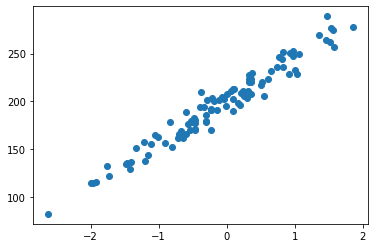

In [103]:
plt.scatter(X,y)

In [104]:
coef, bias #m,c from sklearn

(array(41.74110031), 200)

In [105]:
y_gen = X*coef +bias #equation of line

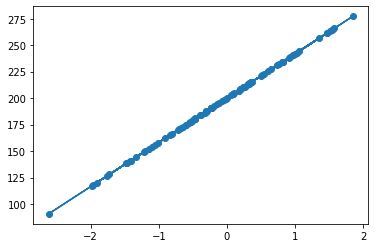

In [106]:
plt.scatter(X,y_gen)
plt.plot(X,y_gen)

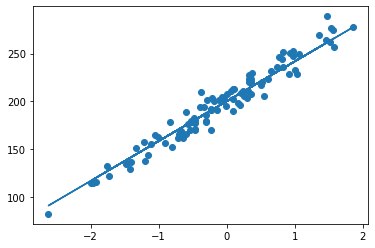

In [107]:
plt.scatter(X, y)
plt.plot(X, y_gen)

In [108]:
#lets aplot a line using linear regression
from sklearn.linear_model import LinearRegression

In [109]:
model= LinearRegression()
model.fit(X,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
model.coef_, model.intercept_

(array([44.43716999]), 201.16511532052695)

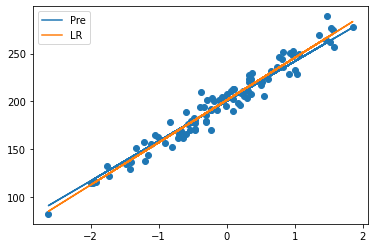

In [111]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="LR")
plt.legend()


In [112]:
class LinearRegCustom:
     #constructor
    def __init__(self,lr=0.1):
       self.lr=lr
    
     #training fxn i.e. fit
    def fit(self, X, y):
        self._X = X # _X mock behavior like private
        self._y = y.reshape(-1, 1) # do calculations, else it will give error due to some numpy shape
             
        # need to figure out value of coef & intercept
        # step 1: pick these values at random 

        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()

        # gradient descent
        errors = []
        
        # lets say we do this 50 times
        for i in range(50):
          self.gradient_decend()
          errors.append(self.error())
        return errors
    def gradient_decend(self):
        # change in coef and intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yh = self.predict(self._X) # from predict funtion
        
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()

        



In [113]:
model = LinearRegCustom(lr=.1)


In [114]:
errors = model.fit(X, y)
model.coef_, model.intercept_


(42.73688036819178, 199.66133126321668)

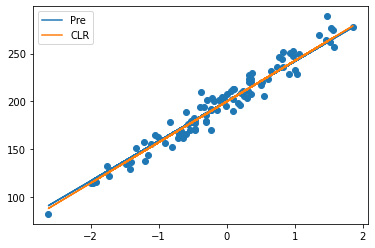

In [115]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()

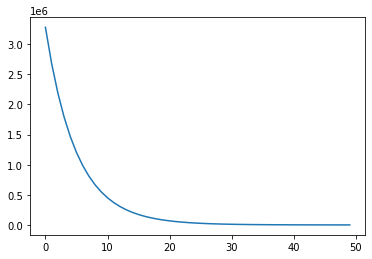

In [116]:
plt.plot(errors)


#Salary Prediction using Linear Regression



In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [118]:
dataset = pd.read_csv("Salary_Data.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [120]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
model.predict(X_test[:5])


array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028])

In [122]:
y_test[:5]


array([112635.,  67938., 113812.,  83088.,  64445.])

In [123]:
model.score(X_test, y_test)


0.9553063138044949

In [ ]:
yrs = int(input("How many yrs of experience do you have: "))
sal = model.predict(np.array([yrs]).reshape(-1, 1))
print("\nYour estimated salary is $", round(sal[0], 3))
